In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [91]:
dataSet = pd.read_csv('house_price.csv')
sns.set()
data = dataSet[dataSet['city'] == '上海']
data['commercial_residence_MOM'].astype(float, copy=False) 
data

,id,time,city,residence_MOM,residence_YOY,residence_FBI,commercial_residence_MOM,commercial_residence_YOY,commercial_residence_FBI,second_hand_MOM,second_hand_YOY,second_hand_FBI
5,6,2011年01月,上海,100.9,101.5,100.8,101.1,101.5,100.8,100.5,101.7,100.6
75,76,2011年02月,上海,100.9,102.3,101.8,101.1,102.3,101.8,100.4,102.0,101.0
145,146,2011年03月,上海,100.2,101.7,102.0,100.2,101.7,102.0,100.4,100.5,101.4
215,216,2011年04月,上海,100.3,101.3,102.3,100.3,101.3,102.3,100.6,100.2,102.0
285,286,2011年05月,上海,100.2,101.4,102.4,100.2,101.4,102.4,100.2,100.5,102.3
355,356,2011年06月,上海,100.1,102.2,102.6,100.1,102.2,102.6,100.2,102.4,102.5
425,426,2011年07月,上海,100.0,102.5,102.6,100.0,102.5,102.6,100.3,103.8,102.8
495,496,2011年08月,上海,100.0,102.8,102.6,100.0,102.8,102.6,100.1,103.7,102.9
565,566,2011年09月,上海,100.0,103.1,102.6,100.0,103.1,102.6,100.1,103.4,103.0
635,636,2011年10月,上海,99.8,102.9,102.3,99.7,102.9,102.3,99.8,103.3,102.8


# 注解
- 我们使用ARIMA模型对时间做序列分析，但是该模型要求序列是平稳的

- 所谓平稳就是围绕着一个常数上下波动，但是初始序列的图像很明显不平稳

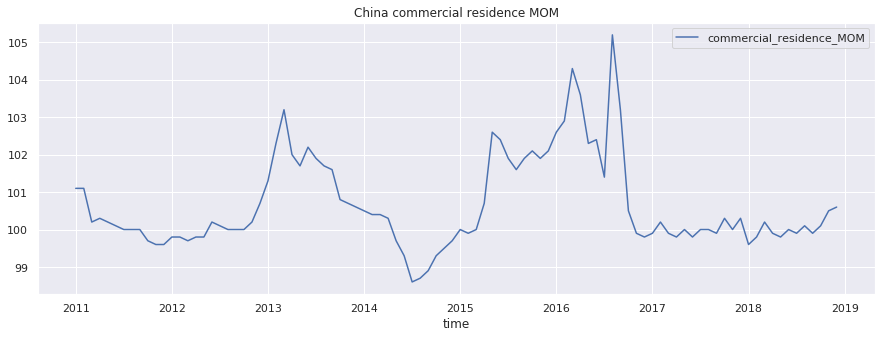

In [154]:
shanghai_MOM = data[['time', 'commercial_residence_MOM']].reset_index().drop('index', axis=1)
shanghai_MOM['time'] = shanghai_MOM['time'].apply(lambda x:"-".join(re.findall(r'\d+', x)))
shanghai_MOM['time'] = pd.to_datetime(shanghai_MOM['time'] )
shanghai_MOM.plot(x='time', y='commercial_residence_MOM', figsize=(15,5), title=u"China commercial residence MOM")

# 差分

- 所谓差分就是后一项减去前一项，由于第一项没有前一项所以会造成一个None值，此处我们把它过滤掉

- 一阶差分的差分为二阶差分，二阶差分的差分为三阶差分，其余类推
- 记：$\Delta ^ n[f](x)$为$f(x)$的n阶差分，则有:  $\Delta ^ n[f](x)$ = $\Delta \{ \Delta^ {n-1}[f](x)  \}$ = $\Delta ^ {n-1}[f](x + 1)$ - $\Delta ^ {n-1}[f](x)$

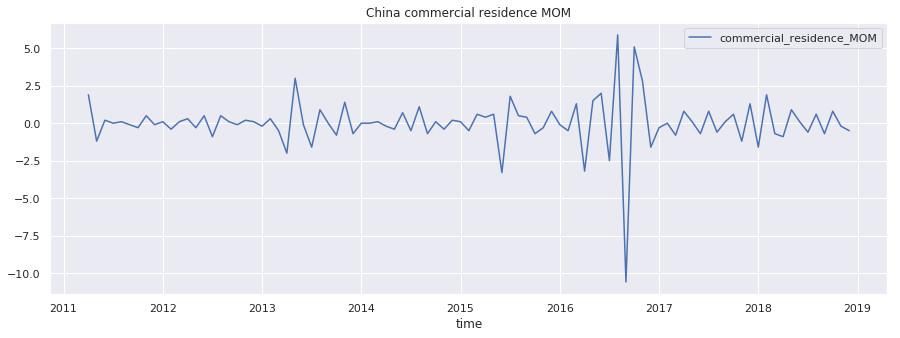

In [163]:
# 时间序列做差分
# 由图像可以看出一阶差分已经很平稳了

tmp = shanghai_MOM.iloc[:, [0,1]]  # 注意当列的数量大于1时才会拷贝对象，避免直接操作污染元数据
tmp['commercial_residence_MOM'] = result['commercial_residence_MOM'].diff(1)
tmp.plot(x='time', y='commercial_residence_MOM', figsize=(15,5), title=u"China commercial residence MOM")

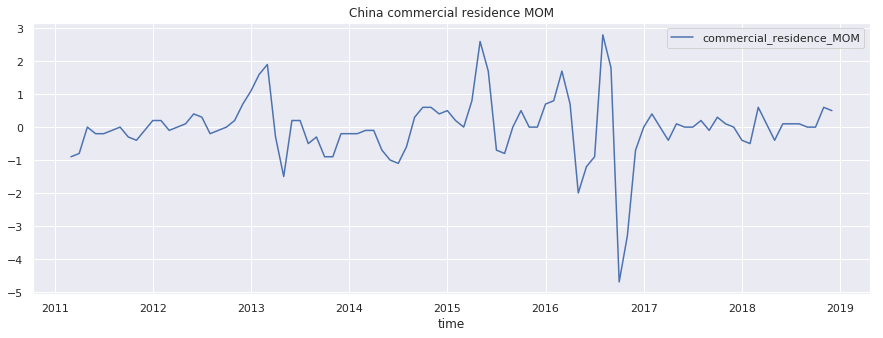

In [167]:
# 可以看出二阶差分后的时间序列与一阶差分相差不大，并且二者随着时间推移，时间序列的均值和方差保持不变。
# 因此可以将差分次数d设置为1。 

tmp = shanghai_MOM.iloc[:, [0,1]]
tmp['commercial_residence_MOM'] = tmp['commercial_residence_MOM'].diff(2)  # 由于已经做过一次差分，所以参数为1
tmp.plot(x='time', y='commercial_residence_MOM', figsize=(15,5), title=u"China commercial residence MOM")

# ARIMA模型的超参数

- 现在我们已经得到一个平稳的时间序列，接来下就是选择合适的ARIMA模型，即ARIMA模型中合适的$p$,$q$。 
- 第一步我们要先检查平稳时间序列的自相关图和偏自相关图。

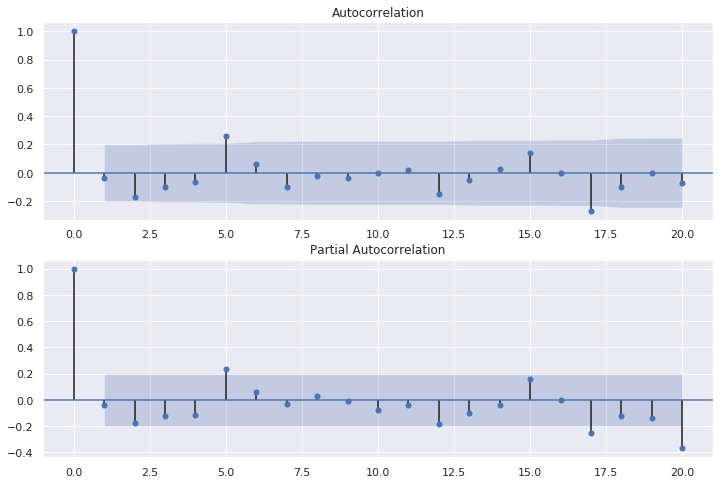

In [194]:
fig = plt.figure(figsize=(12,8))

ax1=fig.add_subplot(211)

diff = shanghai_MOM.iloc[:, [0,1]]

diff['commercial_residence_MOM'] = diff['commercial_residence_MOM'].diff(1)

diff = diff.dropna()  # 去除NaN值，否则导致图像绘制失真

fig = sm.graphics.tsa.plot_acf(diff['commercial_residence_MOM'],lags=20,ax=ax1)  # lags 表示滞后的阶数

ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(diff['commercial_residence_MOM'],lags=20,ax=ax2)

通常，我们认为超过蓝色阴影的自回归系数是显著的，也就是说如果我们做显著性检验的话，往往是能通过的，而没有超过蓝色阴影的那些回归系数，通常是不显著的。

In [199]:
arma_mod20 = sm.tsa.ARMA(diff['commercial_residence_MOM'],(5,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)

203.98710249758307 221.86424073878686 211.21080757708805


/home/miku/anaconda2/envs/sun/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


# 对ARMA模型所产生的残差做自相关图

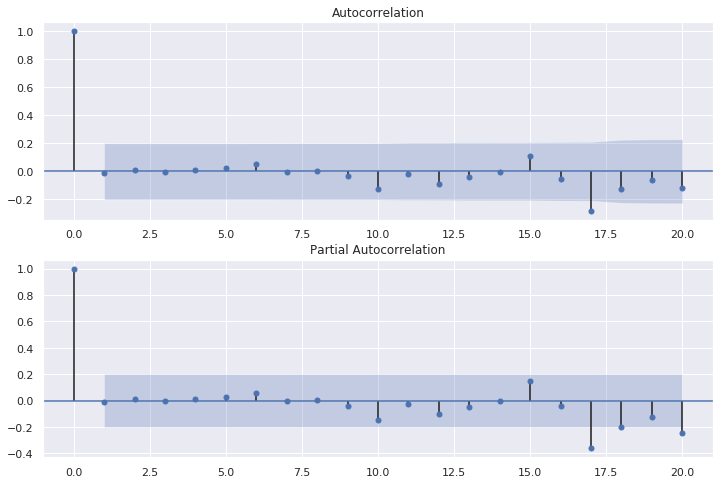

In [202]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
resid = arma_mod20.resid
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=20, ax=ax2)

# D-W校验

德宾-沃森（Durbin-Watson）检验。德宾-沃森检验,简称D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性。因为自相关系数ρ的值介于-1和1之间，所以 :

- 0≤DW≤４并且DW ＝O ＜ ＝＞ρ＝１　　 即存在正自相关性 
- DW＝４＜＝＞ρ＝－１　即存在负自相关性 
- DW＝２＜＝＞ρ＝０　　即不存在（一阶）自相关性 

因此，当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性。这样只要知道ＤＷ统计量的概率分布，在给定的显著水平下，根据临界值的位置就可以对原假设Ｈ０进行检验。

In [203]:
# 下面的结果说明模型的残差不存在相关性

print(sm.stats.durbin_watson(arma_mod20.resid.values))

2.0236128173521912


# 查看残差是否符合正态分布

- 这里使用QQ图，它用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布

/home/miku/anaconda2/envs/sun/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


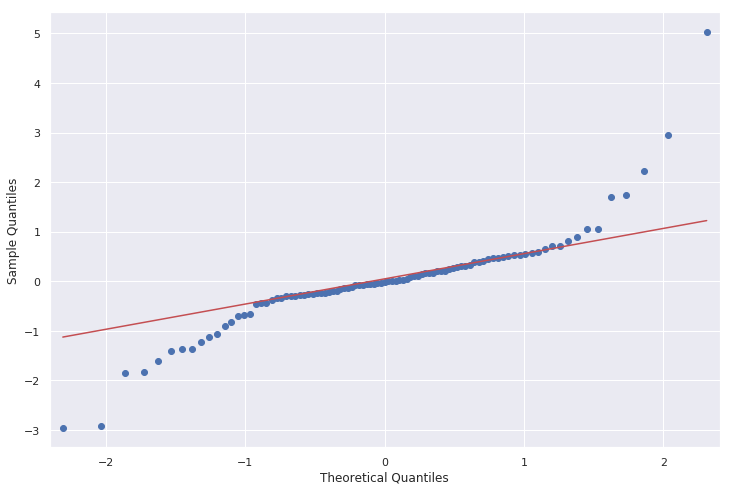

In [205]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

# Ljung-Box　校验

In [212]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.012237   0.014679  0.903567
2.0   0.010575   0.025761  0.987202
3.0  -0.003676   0.027114  0.998822
4.0   0.010284   0.037824  0.999823
5.0   0.022696   0.090566  0.999873
6.0   0.053085   0.382338  0.998990
7.0  -0.007097   0.387613  0.999763
8.0   0.002282   0.388164  0.999949
9.0  -0.035458   0.522884  0.999963
10.0 -0.127524   2.285902  0.993642
11.0 -0.016497   2.315759  0.997043
12.0 -0.087230   3.160541  0.994301
13.0 -0.038260   3.325044  0.996484
14.0 -0.003282   3.326269  0.998340
15.0  0.109776   4.714370  0.994281
16.0 -0.054119   5.056003  0.995468
17.0 -0.284554  14.622017  0.622687
18.0 -0.129519  16.629593  0.548695
19.0 -0.063497  17.118450  0.581843
20.0 -0.120146  18.892044  0.528853
21.0 -0.072489  19.546389  0.550133
22.0  0.017411  19.584654  0.609003
23.0 -0.037236  19.762106  0.656217
24.0 -0.014605  19.789791  0.708665
25.0 -0.147037  22.635908  0.598815
26.0  0.079422  23.478325  0

In [224]:
resid

1     0.004868
2    -0.894945
3     0.065572
4    -0.247043
5    -0.190297
6    -0.192347
7     0.178235
8    -0.050096
9    -0.289953
10   -0.098119
11   -0.029452
12    0.164828
13   -0.019298
14   -0.004756
15    0.137772
16    0.012572
17    0.371909
18   -0.074122
19   -0.000348
20   -0.006498
21    0.017835
22    0.102482
23    0.528719
24    0.688340
25    1.139419
26    1.120384
27   -0.923755
28   -0.177104
29    0.319430
30   -0.545575
        ...   
66   -1.201525
67    3.299852
68   -1.923602
69   -1.941559
70   -0.894282
71   -0.179436
72   -1.219770
73    0.425992
74    0.256191
75    0.068734
76    0.203641
77   -0.218099
78    0.128926
79    0.053384
80   -0.035804
81    0.354666
82   -0.228299
83    0.307157
84   -0.707032
85    0.254370
86    0.206576
87   -0.201706
88   -0.155532
89    0.349940
90   -0.130329
91    0.112781
92   -0.129499
93    0.261397
94    0.345818
95    0.185667
Length: 95, dtype: float64

In [228]:
predict_sunspots = arma_mod20.predict(start=100, end=200, dynamic=True)
print(predict_sunspots)
# fig, ax = plt.subplots(figsize=(12, 8))
# ax = dta.ix['2001':].plot(ax=ax)
# predict_sunspots.plot(ax=ax)

/home/miku/anaconda2/envs/sun/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: could not broadcast input array from shape (0) into shape (5)